# Загрузка датасета:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
embeddings = pd.read_csv("/content/full_sberbank-airuBert-large.csv")
embeddings = embeddings.drop(columns = ['Unnamed: 0'])
embeddings

,levels,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,-0.023434,-0.004745,-0.050740,-0.036257,0.000319,-0.007040,-0.006877,-0.005830,-0.024195,...,-0.029963,-0.041192,-0.003850,0.014002,-0.000568,-0.013752,-0.008779,0.036189,-0.008458,0.017353
1,1,-0.020464,-0.022403,-0.040703,-0.026702,-0.022712,-0.034298,-0.022450,0.017301,-0.003692,...,0.002250,-0.025777,-0.021737,0.009486,0.007064,0.015949,-0.029458,0.026953,-0.015617,0.010611
2,1,0.011707,-0.010058,-0.020822,-0.057053,0.032692,-0.039388,0.024109,0.024320,-0.030061,...,0.035996,0.009117,-0.035071,-0.007486,-0.016822,-0.002471,-0.020736,0.020405,-0.024730,0.012189
3,1,-0.004432,-0.033645,0.007470,-0.021631,0.029239,-0.015297,0.011262,0.034145,-0.029135,...,0.008833,-0.002873,-0.001294,-0.037276,-0.003548,-0.013110,0.002321,0.044035,-0.044873,0.009015
4,1,-0.004087,-0.024342,-0.055855,-0.066229,0.017144,-0.036348,-0.016886,0.020701,-0.038454,...,0.024126,0.055280,-0.015052,0.018264,0.011429,-0.030786,-0.011467,0.005120,-0.034691,0.007593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,6,0.022530,-0.033608,0.030361,-0.061688,0.020227,-0.006023,0.003235,0.036836,0.000677,...,0.049271,0.047013,-0.006938,-0.069982,-0.005208,0.017630,0.016547,0.031859,-0.025260,0.041535
3512,6,0.013223,-0.031325,0.029213,-0.066998,0.024265,-0.001679,0.005881,0.035386,-0.009159,...,0.054537,0.052741,-0.012897,-0.053876,0.001653,0.015295,0.017729,0.038711,-0.027020,0.031819
3513,6,-0.006019,0.002443,-0.015963,-0.028267,0.059663,-0.010130,0.014673,0.034071,0.007025,...,0.039444,0.044291,-0.027741,0.063970,0.068226,0.020817,0.011920,0.031040,-0.018214,0.007083
3514,6,-0.005367,-0.005018,0.000795,-0.065704,0.059135,-0.016085,0.005180,0.031187,-0.050132,...,0.066101,0.062821,-0.053901,-0.002443,0.058898,-0.009231,0.010657,0.048010,-0.023917,0.023588


Убеждаемся, что нет дисбаланса классов:

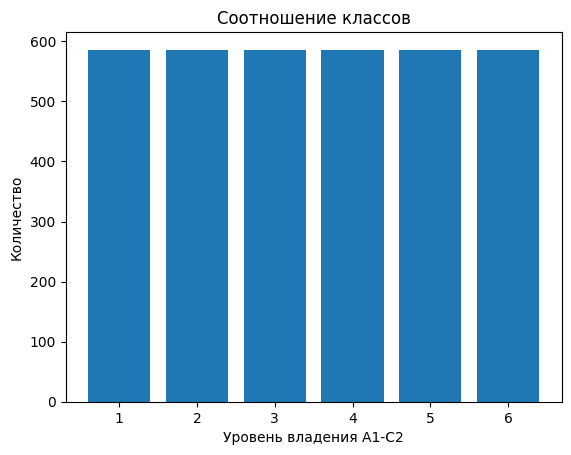

In [ ]:
counts = embeddings['levels'].value_counts()

plt.bar(counts.index, counts.values)
plt.title('Соотношение классов')
plt.xlabel('Уровень владения А1-С2')
plt.ylabel('Количество')
plt.show()

Необходимые импорты:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

Делим датасет на обучающую и тестовую выборки:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(embeddings.iloc[:, 1:], embeddings['levels'],
                                                    train_size=0.8,
                                                    random_state=42)

# RandomForestClassifier

              precision    recall  f1-score   support

          A1       0.77      0.82      0.79       109
          A2       0.70      0.72      0.71       125
          B1       0.56      0.44      0.49       118
          B2       0.85      0.88      0.86       122
          C1       0.76      0.84      0.80       119
          C2       1.00      0.99      1.00       111

    accuracy                           0.78       704
   macro avg       0.77      0.78      0.78       704
weighted avg       0.77      0.78      0.77       704



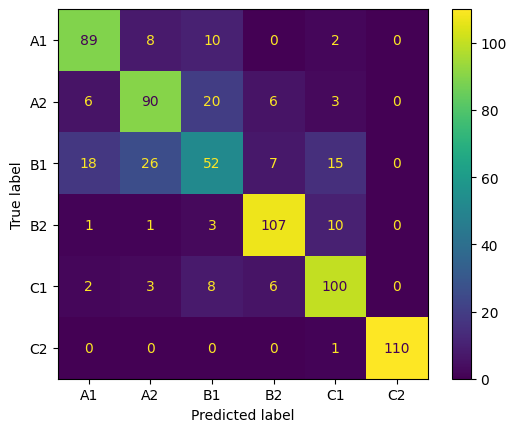

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
target_names = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
print(classification_report(y_test, y_pred_rf, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

# LogisticRegression

              precision    recall  f1-score   support

          A1       0.71      0.78      0.74       109
          A2       0.64      0.62      0.63       125
          B1       0.59      0.49      0.53       118
          B2       0.67      0.68      0.67       122
          C1       0.67      0.70      0.69       119
          C2       0.89      0.95      0.92       111

    accuracy                           0.70       704
   macro avg       0.69      0.70      0.70       704
weighted avg       0.69      0.70      0.69       704



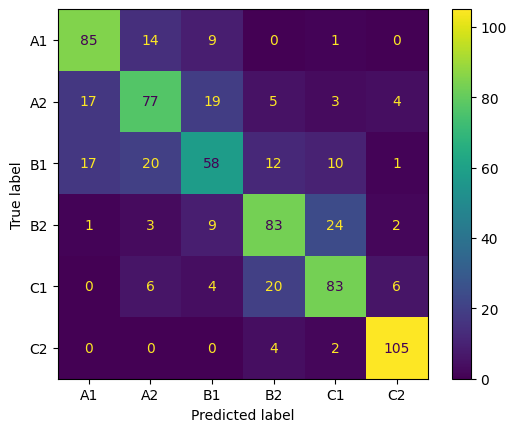

In [ ]:
lg = LogisticRegression(random_state=42)
lg.fit(x_train, y_train)
y_pred_lg = lg.predict(x_test)

#target_names = ['A1', 'A2', 'B1', 'B2', 'C1']
print(classification_report(y_test, y_pred_lg, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_lg, labels=[1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

# DecisionTreeClassifier

              precision    recall  f1-score   support

          A1       0.59      0.55      0.57       109
          A2       0.48      0.50      0.49       125
          B1       0.35      0.36      0.35       118
          B2       0.58      0.57      0.57       122
          C1       0.54      0.51      0.53       119
          C2       0.87      0.95      0.91       111

    accuracy                           0.57       704
   macro avg       0.57      0.57      0.57       704
weighted avg       0.56      0.57      0.57       704



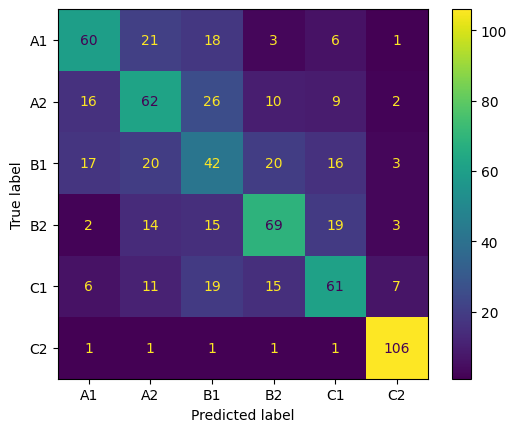

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

#target_names = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
print(classification_report(y_test, y_pred_dt, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_dt, labels=[1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

# KNeighborsClassifier

              precision    recall  f1-score   support

          A1       0.72      0.85      0.78       109
          A2       0.65      0.79      0.71       125
          B1       0.71      0.10      0.18       118
          B2       0.73      0.92      0.81       122
          C1       0.83      0.81      0.82       119
          C2       0.81      1.00      0.90       111

    accuracy                           0.74       704
   macro avg       0.74      0.75      0.70       704
weighted avg       0.74      0.74      0.70       704



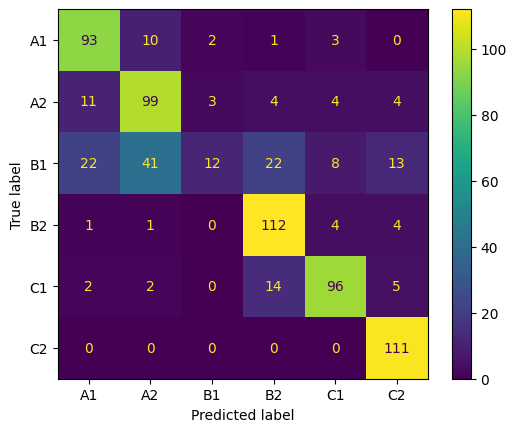

In [ ]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

#target_names = ['A1', 'A2', 'B1', 'B2', 'C1']
print(classification_report(y_test, y_pred_knn, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_knn, labels=[1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

# CatBoostClassifier

In [ ]:
from sklearn.utils.class_weight import compute_class_weight  # балансировка классов, на случай, если подавать несбаланстрованный датасет
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

              precision    recall  f1-score   support

          A1       0.81      0.81      0.81       109
          A2       0.74      0.74      0.74       125
          B1       0.64      0.61      0.63       118
          B2       0.85      0.88      0.86       122
          C1       0.83      0.85      0.84       119
          C2       1.00      1.00      1.00       111

    accuracy                           0.81       704
   macro avg       0.81      0.81      0.81       704
weighted avg       0.81      0.81      0.81       704



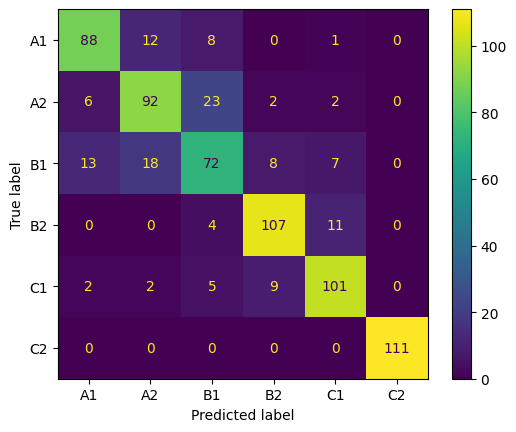

In [ ]:
cb = CatBoostClassifier(random_state=42, class_weights=class_weights, verbose=False)
cb.fit(x_train, y_train)
y_pred_cb = cb.predict(x_test)

#target_names = ['A1', 'A2', 'B1', 'B2', 'C1']
print(classification_report(y_test, y_pred_cb, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_cb, labels=[1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

# XGBClassifier

In [ ]:
le = LabelEncoder()                        # перевод меток классов из 1-6 в 0-5. Нужны для XGBClassifier и для нейронной сети
y_train_xb = le.fit_transform(y_train)
y_test_xb = le.fit_transform(y_test)

In [ ]:
y_test_xb

array([1, 0, 3, 3, 0, 2, 2, 1, 2, 0, 1, 2, 5, 2, 3, 1, 2, 4, 4, 1, 4, 2,
       1, 1, 3, 5, 1, 0, 2, 4, 4, 1, 3, 0, 1, 5, 1, 1, 4, 2, 1, 2, 2, 5,
       3, 1, 3, 1, 2, 0, 2, 2, 0, 0, 5, 5, 0, 5, 0, 4, 5, 0, 5, 0, 4, 2,
       0, 3, 3, 0, 3, 1, 2, 0, 0, 2, 4, 3, 3, 5, 3, 1, 4, 5, 4, 5, 5, 5,
       3, 2, 4, 1, 1, 0, 4, 5, 1, 2, 2, 1, 3, 5, 2, 2, 4, 2, 1, 0, 4, 4,
       1, 5, 1, 2, 2, 4, 5, 0, 1, 0, 1, 4, 2, 4, 4, 5, 0, 2, 0, 0, 3, 4,
       3, 0, 4, 5, 0, 2, 2, 0, 3, 4, 3, 0, 5, 5, 3, 0, 3, 3, 0, 3, 2, 0,
       4, 4, 2, 3, 2, 3, 3, 0, 3, 1, 0, 0, 1, 2, 5, 0, 3, 1, 4, 4, 1, 3,
       4, 1, 3, 4, 3, 3, 1, 2, 5, 3, 5, 1, 0, 5, 1, 0, 1, 2, 2, 5, 0, 2,
       4, 3, 3, 4, 3, 1, 5, 2, 0, 1, 3, 4, 1, 2, 3, 1, 5, 4, 4, 5, 1, 4,
       2, 5, 3, 1, 3, 3, 5, 3, 5, 3, 4, 5, 2, 2, 5, 1, 0, 4, 1, 1, 2, 2,
       3, 0, 4, 5, 2, 0, 5, 0, 0, 2, 2, 2, 5, 0, 5, 1, 0, 4, 5, 2, 3, 2,
       4, 1, 5, 2, 4, 2, 1, 5, 2, 4, 4, 1, 2, 5, 0, 2, 2, 4, 1, 0, 2, 2,
       1, 1, 2, 4, 1, 3, 2, 0, 0, 3, 5, 4, 0, 5, 0,

              precision    recall  f1-score   support

          A1       0.78      0.84      0.81       109
          A2       0.74      0.73      0.73       125
          B1       0.69      0.55      0.61       118
          B2       0.85      0.90      0.87       122
          C1       0.80      0.87      0.83       119
          C2       1.00      0.99      1.00       111

    accuracy                           0.81       704
   macro avg       0.81      0.81      0.81       704
weighted avg       0.81      0.81      0.81       704



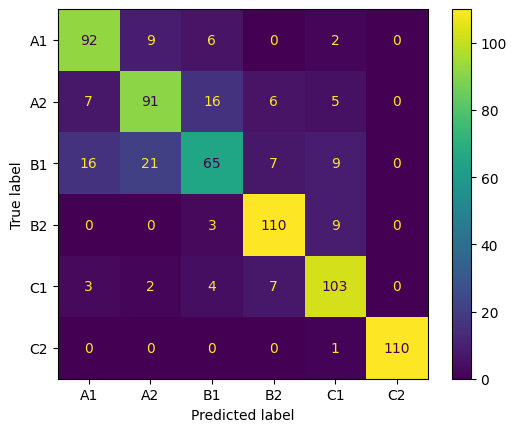

In [ ]:
xb = XGBClassifier(random_state=42)
xb.fit(x_train, y_train_xb)
y_pred_xb = xb.predict(x_test)

#target_names = ['A1', 'A2', 'B1', 'B2', 'C1']
print(classification_report(y_test_xb, y_pred_xb, target_names=target_names))
cm = confusion_matrix(y_test_xb, y_pred_xb, labels=[0, 1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

# Нейросеть

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)
        return out

In [ ]:
# Параметры модели
input_size = 1024  # Размерность эмбеддинга
hidden_size = 50  # Количество нейронов в скрытом слое
num_classes = 6   # Количество классов

In [ ]:
model = NeuralNetwork(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
X = torch.tensor(x_train.values, dtype=torch.float32)
y = torch.tensor(y_train_xb, dtype=torch.long)

In [ ]:
num_epochs = 4000
for epoch in range(num_epochs):

    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 100/4000, Loss: 0.8940315246582031
Epoch 200/4000, Loss: 0.4752255380153656
Epoch 300/4000, Loss: 0.19415049254894257
Epoch 400/4000, Loss: 0.06023161858320236
Epoch 500/4000, Loss: 0.021909847855567932
Epoch 600/4000, Loss: 0.011037888005375862
Epoch 700/4000, Loss: 0.006779521703720093
Epoch 800/4000, Loss: 0.004682830069214106
Epoch 900/4000, Loss: 0.0032782303169369698
Epoch 1000/4000, Loss: 0.002369030611589551
Epoch 1100/4000, Loss: 0.0018531031673774123
Epoch 1200/4000, Loss: 0.0015286816051229835
Epoch 1300/4000, Loss: 0.0013089424464851618
Epoch 1400/4000, Loss: 0.001152380253188312
Epoch 1500/4000, Loss: 0.0010366247734054923
Epoch 1600/4000, Loss: 0.0009484274196438491
Epoch 1700/4000, Loss: 0.0008795608882792294
Epoch 1800/4000, Loss: 0.0008248721715062857
Epoch 1900/4000, Loss: 0.0007806713110767305
Epoch 2000/4000, Loss: 0.0007444719085469842
Epoch 2100/4000, Loss: 0.0007143874536268413
Epoch 2200/4000, Loss: 0.0006890473305247724
Epoch 2300/4000, Loss: 0.0006675434

              precision    recall  f1-score   support

          A1       0.83      0.83      0.83       109
          A2       0.72      0.74      0.73       125
          B1       0.64      0.53      0.58       118
          B2       0.79      0.87      0.83       122
          C1       0.85      0.88      0.87       119
          C2       0.99      1.00      1.00       111

    accuracy                           0.81       704
   macro avg       0.81      0.81      0.81       704
weighted avg       0.80      0.81      0.80       704



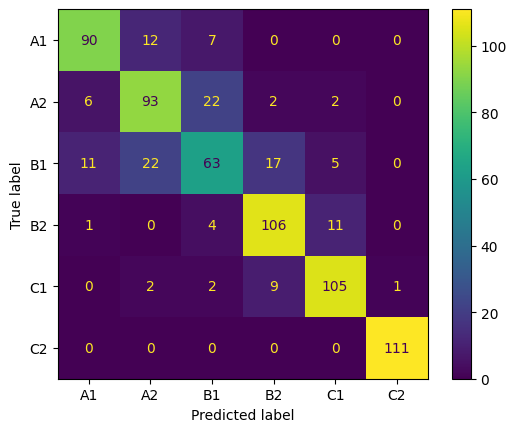

In [ ]:
X_test = torch.tensor(x_test.values, dtype=torch.float32)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)

#target_names = ['A1', 'A2', 'B1', 'B2', 'C1']
print(classification_report(y_test_xb, predicted, target_names=target_names))
cm = confusion_matrix(y_test_xb, predicted, labels=[0, 1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

В нашей задаче лопустимо ошибаться на один класс вниз. Поэтому мы модифицируем метрику accuracy:

In [ ]:
def acceptable_accuracy(true_labels, predicted_labels):
    tp = 0
    wrong = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == true_labels[i] or predicted_labels[i] == true_labels[i]-1:
            tp += 1
        else:
            wrong += 1
    return tp / (tp + wrong)

Теперь обучаем нейросеть с условием новой метрики:

In [ ]:
def softmax(x):
    return ((torch.exp(x)/sum(torch.exp(x))))

In [ ]:
num_epochs = 4000
w = 0.1
for epoch in range(num_epochs):

    outputs = model(X)
    outputs_labels = torch.argmax(softmax(outputs), dim = 1)
    loss = criterion(outputs, y) + w * acceptable_accuracy(outputs_labels, y)  # модифицируем функцию потерь

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 100/4000, Loss: 0.9946427345275879
Epoch 200/4000, Loss: 0.5726786255836487
Epoch 300/4000, Loss: 0.30295127630233765
Epoch 400/4000, Loss: 0.16563890874385834
Epoch 500/4000, Loss: 0.12288084626197815
Epoch 600/4000, Loss: 0.11036514490842819
Epoch 700/4000, Loss: 0.10513752698898315
Epoch 800/4000, Loss: 0.10284411162137985
Epoch 900/4000, Loss: 0.1016630157828331
Epoch 1000/4000, Loss: 0.10093220323324203
Epoch 1100/4000, Loss: 0.10044483095407486
Epoch 1200/4000, Loss: 0.10008471459150314
Epoch 1300/4000, Loss: 0.10000342130661011
Epoch 1400/4000, Loss: 0.09981071949005127
Epoch 1500/4000, Loss: 0.09977011382579803
Epoch 1600/4000, Loss: 0.09969044476747513
Epoch 1700/4000, Loss: 0.09963421523571014
Epoch 1800/4000, Loss: 0.09959542006254196
Epoch 1900/4000, Loss: 0.09956992417573929
Epoch 2000/4000, Loss: 0.09955473244190216
Epoch 2100/4000, Loss: 0.09958317130804062
Epoch 2200/4000, Loss: 0.09954693168401718
Epoch 2300/4000, Loss: 0.09958703815937042
Epoch 2400/4000, Loss: 

              precision    recall  f1-score   support

          A1       0.83      0.83      0.83       109
          A2       0.73      0.75      0.74       125
          B1       0.68      0.53      0.60       118
          B2       0.77      0.88      0.82       122
          C1       0.86      0.88      0.87       119
          C2       0.99      1.00      1.00       111

    accuracy                           0.81       704
   macro avg       0.81      0.81      0.81       704
weighted avg       0.81      0.81      0.81       704



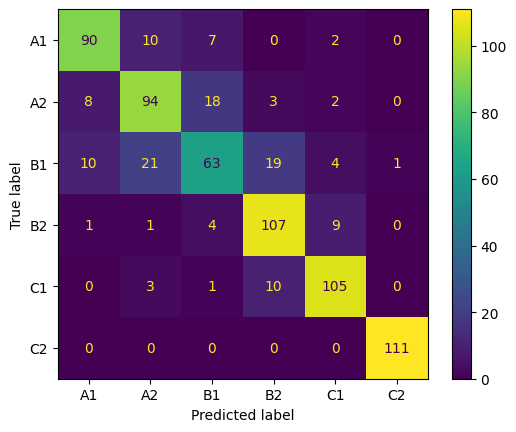

In [ ]:
X_test = torch.tensor(x_test.values, dtype=torch.float32)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted_new = torch.max(outputs.data, 1)

#target_names = ['A1', 'A2', 'B1', 'B2', 'C1']
print(classification_report(y_test_xb, predicted_new, target_names=target_names))
cm = confusion_matrix(y_test_xb, predicted_new, labels=[0, 1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp.plot()
plt.show()

# Выводим качество с новой метрикой:

In [ ]:
f'NeuralNetwork {acceptable_accuracy(y_test_xb, predicted_new)}'

'NeuralNetwork + acc 0.8707386363636364'

In [ ]:
f'XGBClassifier {acceptable_accuracy(y_test_xb, y_pred_xb)}'

'XGBClassifier 0.8664772727272727'

In [ ]:
f'CatBoostClassifier {acceptable_accuracy(np.array(y_test), y_pred_cb)}'

'CatBoostClassifier 0.8636363636363636'

In [ ]:
f'KNeighborsClassifier {acceptable_accuracy(np.array(y_test), y_pred_knn)}'

'KNeighborsClassifier 0.8366477272727273'

In [ ]:
f'LogisticRegression {acceptable_accuracy(np.array(y_test), y_pred_lg)}'

'LogisticRegression 0.7940340909090909'

In [ ]:
f'RandomForestClassifier {acceptable_accuracy(np.array(y_test), y_pred_rf)}'

'RandomForestClassifier 0.8380681818181818'

In [ ]:
f'DecisionTreeClassifier {acceptable_accuracy(np.array(y_test), y_pred_dt)}'

'DecisionTreeClassifier 0.6633522727272727'